Text Mining and Search

Marco Ferrario   795203
Giorgio Ottolina 838017




In [1]:
# import del dataset Amazon

import pandas as pd
import numpy as np
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [27]:
df1 = getDF('reviews_Electronics_5.json.gz')

In [28]:
df2 = getDF('reviews_CDs_and_Vinyl_5.json.gz')

In [29]:
df3 = getDF('reviews_Kindle_Store_5.json.gz')

In [30]:
df4 = getDF('reviews_Movies_and_TV_5.json.gz')

In [26]:
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"
...,...,...,...,...,...,...,...,...,...
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""","[1, 1]",Burned these in before listening to them for a...,5.0,Boom -- Pop -- Pow. These deliver.,1405555200,"07 17, 2014"
1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""","[0, 0]",Some people like DJ style headphones or earbud...,5.0,"Thin and light, without compromising on sound ...",1405382400,"07 15, 2014"
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,"[0, 0]",I&#8217;m a big fan of the Brainwavz S1 (actua...,5.0,Same form factor and durability as the S1 with...,1405555200,"07 17, 2014"
1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,"[0, 0]","I've used theBrainwavz S1 In Ear Headphones, a...",5.0,Superb audio quality in a very comfortable set...,1405641600,"07 18, 2014"


In [30]:
# estrazione numero di valutazioni

df1['helpful_ratings'] = df1['helpful'].apply(lambda x: x[1])
df2['helpful_ratings'] = df2['helpful'].apply(lambda x: x[1])
df3['helpful_ratings'] = df3['helpful'].apply(lambda x: x[1])
df4['helpful_ratings'] = df4['helpful'].apply(lambda x: x[1])

In [ ]:
# 5.466.932 reviews

In [31]:
# si prendono quelle che sono state valutate più di 5 volte

df1 = df1[(df1.helpful_ratings > 5)].copy() #175288
df2 = df2[(df2.helpful_ratings > 5)].copy() #288794
df3 = df3[(df3.helpful_ratings > 5)].copy() #48000
df4 = df4[(df4.helpful_ratings > 5)].copy() #362282
                                            #874.364

In [32]:
df = pd.concat([df1, df2, df3, df4])

In [33]:
# conta delle paole per ogni recensione

df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split(" ")))

In [34]:
# si prendono in considerazione le recensioni formate da almeno 5 parole

cond = df['word_count'] > 4
df = df[cond]

In [35]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_ratings,word_count
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",15,446
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",45,888
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",10,449
26,A26QCCO0101CO1,0972683275,"Amazon Customer ""jkhinch""","[7, 9]",I used this for my 47&#34; Samsung. Its fit/fe...,5.0,Just what I'd hoped,1361404800,"02 21, 2013",9,79
56,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",19,64
...,...,...,...,...,...,...,...,...,...,...,...
1697527,A2CA2Q6JS6CQAE,B00LT1JHLW,"Michael Harris ""Michael Harris""","[10, 14]",Finally to be released on DVD and Blu-Ray Nove...,5.0,Finally on dvd and blu-ray The Batman TV Series,1405987200,"07 22, 2014",14,1208
1697528,AV657BUYHHXZ2,B00LT1JHLW,"Mike Rules ""Mike""","[1, 14]",wow $269.99 for the entire series on Blu Ray??...,1.0,Way to Expensive!! WB = GREED,1406073600,"07 23, 2014",14,93
1697529,A17W587EH23J0Q,B00LT1JHLW,"Ron2900 ""Ron""","[32, 48]","Finally, the holy grail of tv-on-dvd boxsets i...",5.0,"HOLY BAT-BOXSET, BATMAN... I never thought thi...",1405641600,"07 18, 2014",48,136
1697530,A3DE438TF1A958,B00LT1JHLW,thomas henry,"[3, 10]",Could this be a true or I'm i dreaming batman ...,5.0,prayers have been answered because batman 60s ...,1405728000,"07 19, 2014",10,116


In [11]:
# identificazione della lingua di ogni recensione, per poi andare a prendere in considerazione quelle in inglese

from langdetect import detect

def rileva_lingua(testo):
    try:
        return detect(testo)
    except:
        return 'other'

In [12]:
df['language'] = df['reviewText'].apply(rileva_lingua).copy()

In [13]:
df['language'].value_counts()

en       872304
es          890
de          156
fr          101
hr           61
pt           37
ca           30
it           28
af           15
nl           14
so           12
pl           10
cy            9
no            8
da            7
vi            7
tl            6
id            6
tr            5
ro            4
fi            3
et            2
sq            1
other         1
hu            1
Name: language, dtype: int64

In [14]:
# si prendono in considerazione solo le recensioni in ligua inglese

cond = df['language'] == 'en'
df = df[cond]

In [4]:
# considero il testo delle review per effettuare il preprocessing
testo = df['reviewText']

In [5]:
testo

0         I'm a professional OTR truck driver, and I bou...
1         Well, what can I say.  I've had this unit in m...
2         Not going to write a long review, even thought...
3         I used this for my 47&#34; Samsung. Its fit/fe...
4         Quality was excellent. Instructions were clear...
                                ...                        
872299    Finally to be released on DVD and Blu-Ray Nove...
872300    wow $269.99 for the entire series on Blu Ray??...
872301    Finally, the holy grail of tv-on-dvd boxsets i...
872302    Could this be a true or I'm i dreaming batman ...
872303    People seriously need to wake up and realize t...
Name: reviewText, Length: 872304, dtype: object

In [2]:
# librerie per il preprocessing del testo
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [37]:
tokenizer = RegexpTokenizer(r'\w+')

In [9]:
testo = testo.apply(lambda x: tokenizer.tokenize(x)) # il testo è diviso in token

In [10]:
testo = testo.apply(lambda x: " ".join([t.lower() for t in x])) #tutto minuscolo

In [11]:
testo = testo.str.replace('[^\w\s]|_+', '') #punteggiatura

In [12]:
testo = testo.str.replace(r'\d+', '') #numeri

In [14]:
stops = set(stopwords.words("english"))

In [15]:
testo = testo.apply(lambda x: " ".join([w for w in x.split() if w not in stops])) # rimozione stop words

In [6]:
#per stemming e lemmatization divido le recensioni in 3 parti, in modo da non generare memory error

testo1 = testo[0:300000]
testo2 = testo[300000:600000]
testo3 = testo[600000:]

In [3]:
lemmatizer = WordNetLemmatizer() # lemmatization

In [19]:
testo1 = testo1.apply(lambda x: " ".join(lemmatizer.lemmatize(x) for x in x.split()))

In [20]:
testo2 = testo2.apply(lambda x: " ".join(lemmatizer.lemmatize(x) for x in x.split()))

In [21]:
testo3 = testo3.apply(lambda x: " ".join(lemmatizer.lemmatize(x) for x in x.split()))

In [4]:
stemmer = PorterStemmer() # stemming

In [23]:
testo1 = testo1.apply(lambda x: " ".join(stemmer.stem(x) for x in x.split()))

In [24]:
testo2 = testo2.apply(lambda x: " ".join(stemmer.stem(x) for x in x.split()))

In [25]:
testo3 = testo3.apply(lambda x: " ".join(stemmer.stem(x) for x in x.split()))

In [7]:
testo = pd.concat([testo1,testo2,testo3]) 

In [27]:
# nel dataset finale interessano solo la colonna text e overall

df['Text'] = testo
df = df[['Text','overall']]

In [28]:
# salvo il csv con il testo modificato

df.to_csv('text2019_preprocessed.csv')

In [4]:
# si isolano le recensioni divise per ogni valutazione, allo scopo di generane successivamente i word cloud

cond = df['overall'] == 1.0
df1 = df[cond]

In [5]:
cond = df['overall'] == 2.0
df2 = df[cond]

In [6]:
cond = df['overall'] == 3.0
df3 = df[cond]

In [7]:
cond = df['overall'] == 4.0
df4 = df[cond]

In [8]:
cond = df['overall'] == 5.0
df5 = df[cond]

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize']=(8.0,6.0)    
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=2 
    ).generate(' '.join(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

<Figure size 960x800 with 0 Axes>

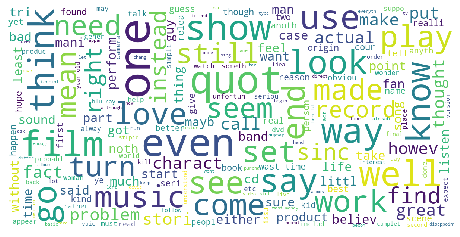

In [13]:
# word cloud per ogni gruppo di recensioni

show_wordcloud(df1['Text'])

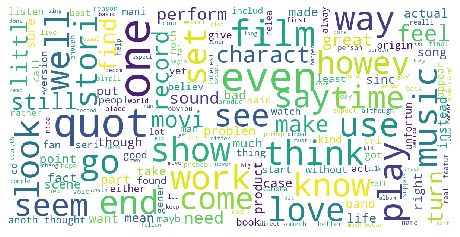

In [14]:
show_wordcloud(df2['Text'])

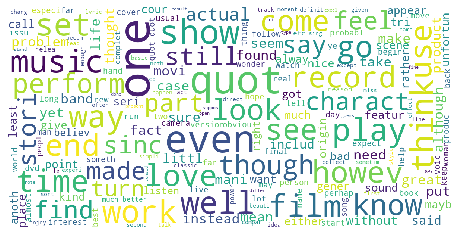

In [15]:
show_wordcloud(df3['Text'])

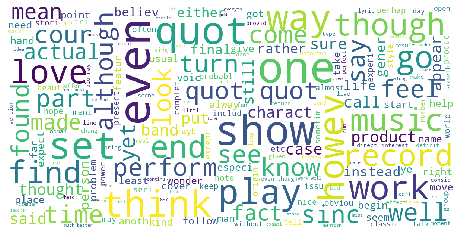

In [16]:
show_wordcloud(df4['Text'])

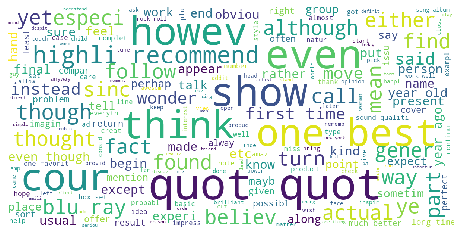

In [17]:
show_wordcloud(df5['Text'])

In [38]:
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split(" ")))

In [46]:
df['word_count'].mean()

144.86511239201013

In [37]:
# per evitare di rieseguire i passaggi del preprocessing, è possibile importare il csv salvato precedentemente 

df = pd.read_csv('text2019_preprocessed.csv') 

In [9]:
X = df.Text
y = df.overall

In [10]:
y.value_counts().sort_index()

1.0    130289
2.0     83975
3.0    106065
4.0    160486
5.0    391489
Name: overall, dtype: int64

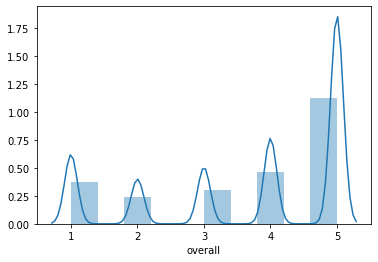

In [46]:
# distribuzione delle classi

import seaborn as sns
from IPython.display import display 

sns.distplot(df['overall'],bins=10)
plt.show()

In [11]:
# divisione in train e test

from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Vettorizzazione con CountVectorizer

In [12]:
# feature extraction

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=5, ngram_range=(1, 2), lowercase=False)

In [13]:
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts  = count_vect.transform(X_test)

In [14]:
X_train_counts

<584443x2156086 sparse matrix of type '<class 'numpy.int64'>'
	with 110976396 stored elements in Compressed Sparse Row format>

In [15]:
# feature selection

from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(score_func=chi2, k=10000)

In [16]:
X_train_counts = kbest.fit_transform(X_train_counts, y_train)
X_test_counts  = kbest.transform(X_test_counts)

In [17]:
from sklearn.svm import LinearSVC
# Linear SVC
SVC = LinearSVC()
%time SVC.fit(X_train_counts, y_train)
y_pred_SVC = SVC.predict(X_test_counts)
metrics.accuracy_score(y_test, y_pred_SVC)

Wall time: 24min 57s


0.605636053511938

In [18]:
metrics.confusion_matrix(y_test, y_pred_SVC)
print(metrics.classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

         1.0       0.61      0.70      0.65     42913
         2.0       0.44      0.17      0.25     27588
         3.0       0.45      0.24      0.31     35465
         4.0       0.46      0.26      0.33     52669
         5.0       0.65      0.91      0.76    129226

    accuracy                           0.61    287861
   macro avg       0.52      0.46      0.46    287861
weighted avg       0.57      0.61      0.56    287861



In [19]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
logreg = LogisticRegression()
%time logreg.fit(X_train_counts, y_train)
y_pred_LR = logreg.predict(X_test_counts)
metrics.accuracy_score(y_test, y_pred_LR)

Wall time: 30min 13s


0.6090613177887939

In [20]:
metrics.confusion_matrix(y_test, y_pred_LR)
print(metrics.classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

         1.0       0.63      0.69      0.66     42913
         2.0       0.44      0.21      0.28     27588
         3.0       0.46      0.25      0.32     35465
         4.0       0.47      0.25      0.33     52669
         5.0       0.66      0.91      0.76    129226

    accuracy                           0.61    287861
   macro avg       0.53      0.46      0.47    287861
weighted avg       0.57      0.61      0.57    287861



In [21]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
%time rforest.fit(X_train_counts, y_train)
y_pred_RF = rforest.predict(X_test_counts)
metrics.accuracy_score(y_test, y_pred_RF)

Wall time: 39.5 s


0.4489458453906573

In [22]:
metrics.confusion_matrix(y_test, y_pred_RF)
print(metrics.classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         1.0       1.00      0.00      0.00     42913
         2.0       0.00      0.00      0.00     27588
         3.0       0.00      0.00      0.00     35465
         4.0       0.00      0.00      0.00     52669
         5.0       0.45      1.00      0.62    129226

    accuracy                           0.45    287861
   macro avg       0.29      0.20      0.12    287861
weighted avg       0.35      0.45      0.28    287861



In [23]:
from sklearn.naive_bayes import MultinomialNB
# Multinomial Naive Bayes
Naive = MultinomialNB()
%time Naive.fit(X_train_counts, y_train)
y_pred_NB = Naive.predict(X_test_counts)
metrics.accuracy_score(y_test, y_pred_NB)

Wall time: 745 ms


0.49959181688384324

In [24]:
metrics.confusion_matrix(y_test, y_pred_NB)
print(metrics.classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

         1.0       0.51      0.68      0.58     42913
         2.0       0.24      0.36      0.29     27588
         3.0       0.31      0.21      0.25     35465
         4.0       0.31      0.29      0.30     52669
         5.0       0.69      0.64      0.66    129226

    accuracy                           0.50    287861
   macro avg       0.42      0.43      0.42    287861
weighted avg       0.51      0.50      0.50    287861



In [22]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boost
gb=GradientBoostingClassifier(n_estimators=10,learning_rate=0.5,max_features=1000, max_depth=2, random_state=0)
%time gb.fit(X_train_counts, y_train)
y_pred_GB = gb.predict(X_test_counts)
metrics.accuracy_score(y_test,y_pred_GB)

Wall time: 2min


0.4957601064402611

In [23]:
metrics.confusion_matrix(y_test, y_pred_GB)
print(metrics.classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

         1.0       0.63      0.26      0.37     42913
         2.0       0.43      0.03      0.05     27588
         3.0       0.58      0.04      0.07     35465
         4.0       0.41      0.08      0.13     52669
         5.0       0.49      0.97      0.65    129226

    accuracy                           0.50    287861
   macro avg       0.51      0.27      0.25    287861
weighted avg       0.50      0.50      0.38    287861



Vettorizzazione con TF-IDF

In [25]:
# feature extraction

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2), lowercase=False)

In [26]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

In [27]:
X_train_vec

<584443x2156086 sparse matrix of type '<class 'numpy.float64'>'
	with 110976396 stored elements in Compressed Sparse Row format>

In [28]:
vectorizer.get_feature_names()

['aa',
 'aa aa',
 'aa aaa',
 'aa af',
 'aa alkalin',
 'aa also',
 'aa alway',
 'aa anywher',
 'aa batt',
 'aa batteri',
 'aa buy',
 'aa camera',
 'aa canon',
 'aa cell',
 'aa chang',
 'aa charger',
 'aa come',
 'aa duracel',
 'aa eneloop',
 'aa energ',
 'aa even',
 'aa filter',
 'aa first',
 'aa get',
 'aa go',
 'aa good',
 'aa great',
 'aa includ',
 'aa instead',
 'aa last',
 'aa le',
 'aa like',
 'aa lithium',
 'aa mah',
 'aa meet',
 'aa ni',
 'aa nice',
 'aa nimh',
 'aa nomin',
 'aa one',
 'aa pinch',
 'aa power',
 'aa quot',
 'aa recharg',
 'aa rocket',
 'aa run',
 'aa size',
 'aa soni',
 'aa still',
 'aa tray',
 'aa two',
 'aa type',
 'aa use',
 'aa work',
 'aa would',
 'aa year',
 'aaa',
 'aaa aa',
 'aaa alkalin',
 'aaa batt',
 'aaa batteri',
 'aaa cell',
 'aaa charger',
 'aaa guid',
 'aaa includ',
 'aaa inform',
 'aaa last',
 'aaa low',
 'aaa member',
 'aaa nimh',
 'aaa power',
 'aaa pre',
 'aaa rate',
 'aaa recharg',
 'aaa roadsid',
 'aaa size',
 'aaa tour',
 'aaa tourbook',
 '

In [29]:
X_train_vec = kbest.fit_transform(X_train_vec, y_train)
X_test_vec  = kbest.transform(X_test_vec)

In [28]:
# Linear SVC
SVC = LinearSVC()
%time SVC.fit(X_train_vec, y_train)
y_pred_SVC = SVC.predict(X_test_vec)
metrics.accuracy_score(y_test, y_pred_SVC)

Wall time: 8min 33s


0.6158354205675656

In [29]:
metrics.confusion_matrix(y_test, y_pred_SVC)
print(metrics.classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

         1.0       0.62      0.73      0.67     42913
         2.0       0.47      0.20      0.28     27588
         3.0       0.48      0.24      0.32     35465
         4.0       0.45      0.24      0.32     52669
         5.0       0.66      0.92      0.77    129226

    accuracy                           0.62    287861
   macro avg       0.54      0.47      0.47    287861
weighted avg       0.58      0.62      0.57    287861



In [30]:
# Logistic Regression
logreg = LogisticRegression()
%time logreg.fit(X_train_vec, y_train)
y_pred_LR = logreg.predict(X_test_vec)
metrics.accuracy_score(y_test, y_pred_LR)

Wall time: 1min 36s


0.609436498865772

In [31]:
metrics.confusion_matrix(y_test, y_pred_LR)
print(metrics.classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

         1.0       0.63      0.71      0.67     42913
         2.0       0.48      0.18      0.26     27588
         3.0       0.47      0.24      0.31     35465
         4.0       0.44      0.24      0.32     52669
         5.0       0.65      0.92      0.76    129226

    accuracy                           0.61    287861
   macro avg       0.53      0.46      0.46    287861
weighted avg       0.57      0.61      0.56    287861



In [32]:
# Random Forest
rforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
%time rforest.fit(X_train_vec, y_train)
y_pred_RF = rforest.predict(X_test_vec)
metrics.accuracy_score(y_test, y_pred_RF)

Wall time: 48.7 s


0.44896668878382273

In [33]:
metrics.confusion_matrix(y_test, y_pred_RF)
print(metrics.classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         1.0       1.00      0.00      0.00     42913
         2.0       0.00      0.00      0.00     27588
         3.0       0.00      0.00      0.00     35465
         4.0       0.00      0.00      0.00     52669
         5.0       0.45      1.00      0.62    129226

    accuracy                           0.45    287861
   macro avg       0.29      0.20      0.12    287861
weighted avg       0.35      0.45      0.28    287861



In [34]:
# Multinomial Naive Bayes
Naive = MultinomialNB()
%time Naive.fit(X_train_vec, y_train)
y_pred_NB = Naive.predict(X_test_vec)
metrics.accuracy_score(y_test, y_pred_NB)

Wall time: 622 ms


0.5131539180368303

In [35]:
metrics.confusion_matrix(y_test, y_pred_NB)
print(metrics.classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

         1.0       0.69      0.42      0.53     42913
         2.0       0.57      0.02      0.04     27588
         3.0       0.54      0.01      0.02     35465
         4.0       0.48      0.00      0.01     52669
         5.0       0.49      0.99      0.66    129226

    accuracy                           0.51    287861
   macro avg       0.56      0.29      0.25    287861
weighted avg       0.54      0.51      0.38    287861



In [36]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=10,learning_rate=0.5,max_features=1000, max_depth=2, random_state=0)
%time gb.fit(X_train_vec, y_train)
y_pred_GB = gb.predict(X_test_vec)
metrics.accuracy_score(y_test,y_pred_GB)

Wall time: 2min 33s


0.49922358360458696

In [37]:
metrics.confusion_matrix(y_test, y_pred_GB)
print(metrics.classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

         1.0       0.62      0.27      0.37     42913
         2.0       0.45      0.06      0.11     27588
         3.0       0.56      0.04      0.08     35465
         4.0       0.38      0.07      0.12     52669
         5.0       0.50      0.97      0.66    129226

    accuracy                           0.50    287861
   macro avg       0.50      0.28      0.27    287861
weighted avg       0.50      0.50      0.39    287861



Vettorizzazione con TF-IDF e Cross Validation

In [34]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [43]:
# Cross Validation con LinearSVC

accuracies = []

for train_index, test_index in kf.split(X):

    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec  = vectorizer.transform(X_test)
    
    X_train_vec = kbest.fit_transform(X_train_vec, y_train)
    X_test_vec  = kbest.transform(X_test_vec)

    
    # Model: Linear SVC
    SVC = LinearSVC()
    SVC.fit(X_train_vec, y_train)
    y_pred_SVC = SVC.predict(X_test_vec)
    # accuracy for the current fold only   
    accuracy = metrics.accuracy_score(y_test, y_pred_SVC)
    

    accuracies.append(accuracy)

    
average_accuracy = np.mean(accuracies)
print(average_accuracy)

0.6176688396064074


In [35]:
# Cross Validation con Logistic Regression

accuracies = []

for train_index, test_index in kf.split(X):

    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec  = vectorizer.transform(X_test)
    
    X_train_vec = kbest.fit_transform(X_train_vec, y_train)
    X_test_vec  = kbest.transform(X_test_vec)

    
    # Model: Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train_vec, y_train)
    y_pred_LR = logreg.predict(X_test_vec)
    # accuracy for the current fold only   
    accuracy = metrics.accuracy_score(y_test, y_pred_LR)

    
    accuracies.append(accuracy)


average_accuracy = np.mean(accuracies)
print(average_accuracy)

0.6116181959726503


In [36]:
# Cross Validation con Random Forest

accuracies = []

for train_index, test_index in kf.split(X):

    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec  = vectorizer.transform(X_test)
    
    X_train_vec = kbest.fit_transform(X_train_vec, y_train)
    X_test_vec  = kbest.transform(X_test_vec)

    
    # Model: Random Forest
    rforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
    rforest.fit(X_train_vec, y_train)
    y_pred_RF = rforest.predict(X_test_vec)
    # accuracy for the current fold only 
    accuracy = metrics.accuracy_score(y_test, y_pred_RF)
    

    accuracies.append(accuracy)


average_accuracy = np.mean(accuracies)
print(average_accuracy)

0.4488664477823415


In [43]:
# Cross Validation con Multinomial Naive Bayes

accuracies = []

for train_index, test_index in kf.split(X):

    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec  = vectorizer.transform(X_test)
    
    X_train_vec = kbest.fit_transform(X_train_vec, y_train)
    X_test_vec  = kbest.transform(X_test_vec)

    
    # Model: Multinomial Naive Bayes 
    Naive = MultinomialNB()
    Naive.fit(X_train_vec, y_train)
    y_pred_NB = Naive.predict(X_test_vec)
    # accuracy for the current fold only
    accuracy = metrics.accuracy_score(y_test, y_pred_NB)

    
    accuracies.append(accuracy)


average_accuracy = np.mean(accuracies)
print(average_accuracy)

0.5242083021447859


In [44]:
#Cross Validation con Gradient Boost

accuracies = []

for train_index, test_index in kf.split(X):

    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec  = vectorizer.transform(X_test)
    
    X_train_vec = kbest.fit_transform(X_train_vec, y_train)
    X_test_vec  = kbest.transform(X_test_vec)

    
    # Model: Gradient Boost
    gb = GradientBoostingClassifier(n_estimators=10,learning_rate=0.5,max_features=1000, max_depth=2, random_state=0)
    gb.fit(X_train_vec, y_train)
    y_pred_GB = gb.predict(X_test_vec)
    # accuracy for the current fold only
    accuracy = metrics.accuracy_score(y_test,y_pred_GB)
    

    accuracies.append(accuracy)


average_accuracy = np.mean(accuracies)
print(average_accuracy)

0.49494442258517574
